Jahr =  [1989 1990 1991 1992 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]


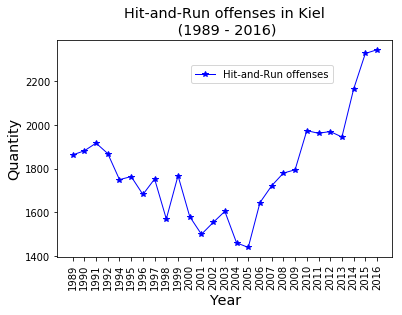

In [3]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io

# Fetch data from www.kiel.de
CSV_URL = 'https://www.kiel.de/opendata/kiel_gesetze_justiz_strassenverkehsunfaelle_verkehrstote_verletzte_fahrerflucht.csv'
csv_data = requests.get(CSV_URL).content

# Create dataframe
df = pd.read_csv(io.StringIO(csv_data.decode('latin1')), sep=';')

# print head
# print(df.head())

# Plot the data
fig, ax = plt.subplots()

df_cleaned = df.dropna(how='all')
df_years = df_cleaned['Jahr'].astype(np.uint16)

x = df_years.values
y = df_cleaned['Fahrerfluchten'].values

print("Jahr = ", x)

plt.title("Hit-and-Run offenses in Kiel\n (1989 - 2016)", size="x-large")
plt.ylabel("Quantity", size="x-large")
plt.xlabel("Year", size="x-large")

plt.plot(y, "r*-", markersize=6, linewidth=1, color='b', label="Hit-and-Run offenses")

plt.legend(loc=(0.4, 0.8))

ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation='vertical')

plt.show()